In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
type(x_train)

numpy.ndarray

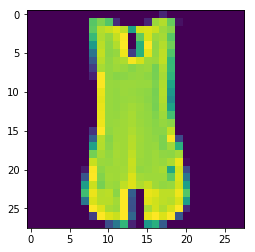

In [0]:
plt.imshow(x_train[4])

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train_reshape=x_train.reshape(60000,-1)

In [0]:
x_train_reshape.shape

(60000, 784)

In [0]:
x_test_reshape=x_test.reshape(10000,-1)

In [0]:
x_test_reshape.shape

(10000, 784)

In [0]:
y_train.shape

(60000,)

In [0]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu',input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history=model.fit(x_train_reshape, y_train,epochs=100,batch_size=128)

Epoch 1/100
60000/60000 [==============================] - 3s 50us/step - loss: 1.1602 - acc: 0.5873
Epoch 2/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.7964 - acc: 0.7133
Epoch 3/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.7306 - acc: 0.7396
Epoch 4/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.6931 - acc: 0.7504
Epoch 5/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.6668 - acc: 0.7592
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.6460 - acc: 0.7666
Epoch 7/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.6310 - acc: 0.7723
Epoch 8/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.6172 - acc: 0.7768
Epoch 9/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.6056 - acc: 0.7801
Epoch 10/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.6024 - a

In [0]:
score = model.evaluate(x_test_reshape, y_test, batch_size=128)

10000/10000 [==============================] - 0s 38us/step


In [0]:
score

[0.4436765860557556, 0.865]

In [0]:
x_train_reshape=x_train.reshape(60000,28,28,1)
x_test_reshape=x_test.reshape(10000,28,28,1)

In [0]:
x_test_reshape.shape

(10000, 28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history=model.fit(x_train_reshape, y_train,epochs=10,batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2863 - acc: 0.8974
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2482 - acc: 0.9097
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2199 - acc: 0.9191
Epoch 4/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1994 - acc: 0.9258
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1789 - acc: 0.9331
Epoch 6/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1627 - acc: 0.9380
Epoch 7/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1488 - acc: 0.9443
Epoch 8/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1342 - acc: 0.9496
Epoch 9/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1236 - acc: 0.9529
Epoch 10/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1139 - acc:

In [0]:
model.evaluate(x_test_reshape, y_test, batch_size=128)

10000/10000 [==============================] - 6s 620us/step


[0.3084359941482544, 0.9095]